#Project 1 : Kannada MNIST - Classification Problem

In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [11]:
# load training data
X_train_data = np.load('X_kannada_MNIST_train.npz')
X_train = X_train_data['arr_0']
y_train_data = np.load('y_kannada_MNIST_train.npz')
y_train = y_train_data['arr_0']


In [12]:
# load testing data
X_test_data = np.load('X_kannada_MNIST_test.npz')
X_test = X_test_data['arr_0']
y_test_data = np.load('y_kannada_MNIST_test.npz')
y_test = y_test_data['arr_0']

In [13]:
# reshaping the data to match the original format
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [15]:
# desired component sizes
size = int(input('Please enter the PCA component size: '))
# PCA
pca = PCA(n_components = size)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
# roc-auc function
def roc_auc(classifier):
    # Predict probabilities for the test set
    y_proba = classifier.predict_proba(X_test_pca)

    # Binarize the true labels
    y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

    # Compute the ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_test_bin.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot the ROC curves for each class
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})')
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the random curve
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


RESULTS FOR DECISION TREE WITH 30 COMPONENTS:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.75      1000
           1       0.77      0.79      0.78      1000
           2       0.92      0.93      0.93      1000
           3       0.78      0.79      0.79      1000
           4       0.79      0.83      0.81      1000
           5       0.82      0.79      0.81      1000
           6       0.81      0.81      0.81      1000
           7       0.75      0.67      0.71      1000
           8       0.81      0.89      0.85      1000
           9       0.80      0.81      0.80      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



Confusion Matrix:
[[724 147  15  30   8   2   4  11  42  17]
 [ 96 787  14  23   9  13   7   9  29  13]
 [  5   2 930  14   0  24   2  10   5   8]
 [ 17   9  11 791  23  

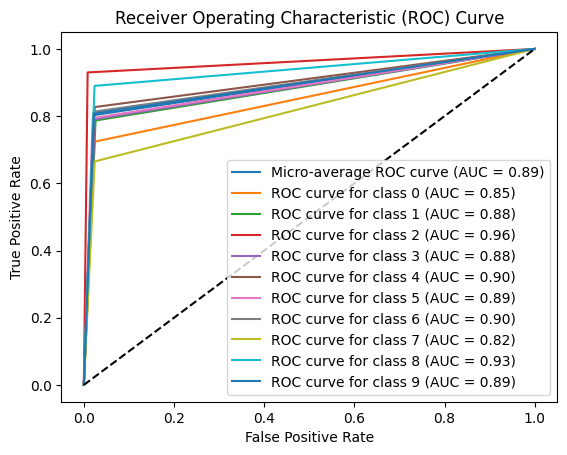

In [17]:
# Decision trees
print(f"RESULTS FOR DECISION TREE WITH {size} COMPONENTS:")
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_pca,y_train)
y_pred_dt = dt_classifier.predict(X_test_pca)
print('Classification Report:')
print(classification_report(y_test, y_pred_dt))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))
print('\n')
roc_auc(dt_classifier)

Results for Random Forest with 30 components:
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1000
           1       0.84      0.94      0.89      1000
           2       0.99      0.98      0.99      1000
           3       0.89      0.92      0.90      1000
           4       0.85      0.95      0.90      1000
           5       0.92      0.88      0.90      1000
           6       0.88      0.88      0.88      1000
           7       0.94      0.79      0.86      1000
           8       0.90      0.97      0.94      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000

Confusion Matrix:
[[805 148   1  18   3   0   2   4  14   5]
 [ 15 940   1  18   5   3   0   0  12   6]
 [  3   1 984   2   0   8   1   0   1   0]
 [  9   7   2 920  18  15

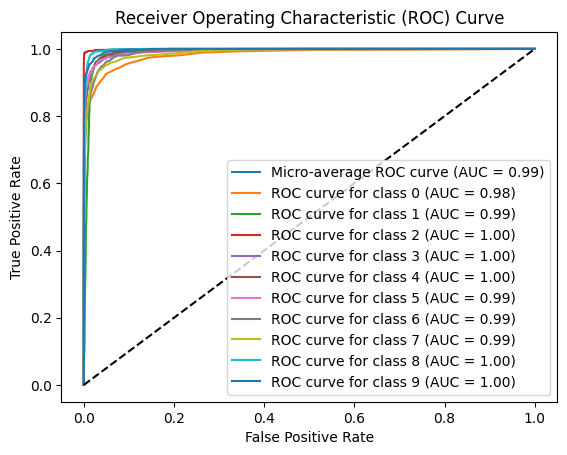

In [18]:
# Random Forest
print(f"Results for Random Forest with {size} components:")
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_pca, y_train)
y_pred_rf = rf_classifier.predict(X_test_pca)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
roc_auc(rf_classifier)

Results for Naive Bayes with 30 components:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.64      0.72      1000
           1       0.74      0.84      0.79      1000
           2       0.91      0.98      0.94      1000
           3       0.80      0.82      0.81      1000
           4       0.76      0.88      0.82      1000
           5       0.88      0.78      0.83      1000
           6       0.79      0.81      0.80      1000
           7       0.77      0.71      0.74      1000
           8       0.78      0.85      0.81      1000
           9       0.93      0.84      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000

Confusion Matrix:
[[641 235  17  33  10   0   2  12  43   7]
 [ 12 844   4  63  10   5   0   4  46  12]
 [ 11   1 979   3   0   2   2   1   0   1]
 [ 15  11   1 818  27  17  

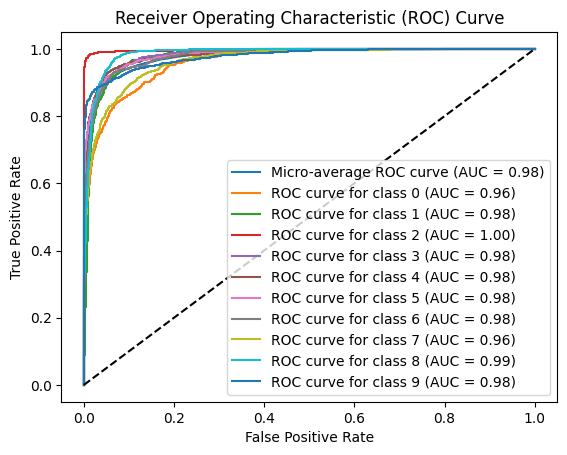

In [19]:
# Naive Bayes
print(f"Results for Naive Bayes with {size} components:")
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_pca, y_train)
y_pred_nb = nb_classifier.predict(X_test_pca)
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
roc_auc(nb_classifier)

Results for K-NN Classifier with 30 components:
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1000
           1       0.84      0.98      0.91      1000
           2       1.00      0.99      0.99      1000
           3       0.94      0.94      0.94      1000
           4       0.85      0.98      0.91      1000
           5       0.96      0.90      0.93      1000
           6       0.91      0.93      0.92      1000
           7       0.95      0.82      0.88      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

Confusion Matrix:
[[820 155   0   8   4   0   0   2   7   4]
 [  8 980   0   1   5   0   1   0   3   2]
 [  2   1 990   3   0   1   3   0   0   0]
 [  5  13   1 938  15  

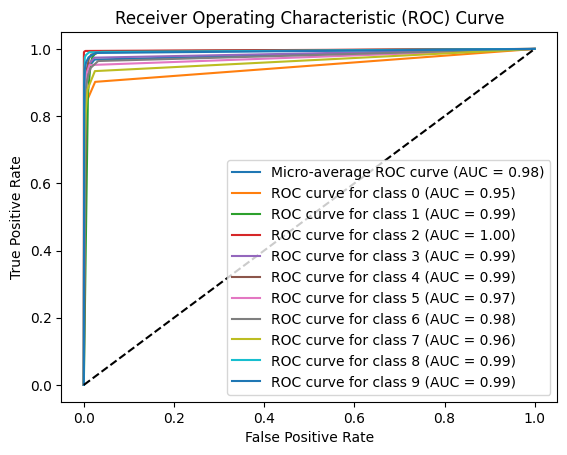

In [20]:
# K-NN Classifier
print(f"Results for K-NN Classifier with {size} components:")
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_pca, y_train)
y_pred_knn = knn_classifier.predict(X_test_pca)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
roc_auc(knn_classifier)

Results for SVM with 30 components:
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1000
           1       0.88      0.97      0.93      1000
           2       1.00      0.99      0.99      1000
           3       0.94      0.94      0.94      1000
           4       0.88      0.97      0.93      1000
           5       0.96      0.92      0.94      1000
           6       0.92      0.94      0.93      1000
           7       0.97      0.84      0.90      1000
           8       0.96      0.99      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

Confusion Matrix:
[[861 112   0   9   2   0   1   3   9   3]
 [  7 973   0  10   3   0   2   0   3   2]
 [  3   0 990   3   1   1   1   0   1   0]
 [  5   5   1 936  16  18   5  14  

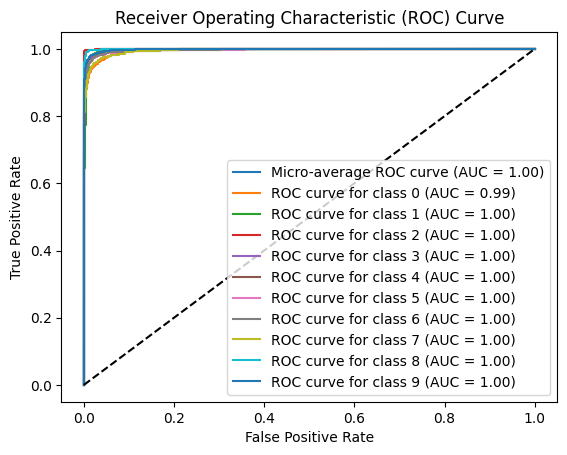

In [21]:
# SVM
print(f"Results for SVM with {size} components:")
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_pca, y_train)
y_pred_svm = svm_classifier.predict(X_test_pca)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
roc_auc(svm_classifier)